In [429]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

In [430]:
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y,dtype=complex)
    dt=1/x[1]-x[0]
    assert np.sqrt(2)<dt/2, "Frecuencia de la señal mayor al limite de Nysquic"
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)

## PUNTO 2 a

In [431]:
t_max=5
N=400
t=np.linspace(0,t_max,N)
f=lambda t:np.sin(2*np.pi*t*np.sqrt(2))
f_2=lambda t:np.sin(t) ###Prueba
y=f(t)
y_2=f(t) ###Prueba

In [432]:
Transformada_Fourier(t,y_2,0.1) ##Prueba

(16.933018140469635+0.2758923985339603j)

## PUNTO 2 c

In [433]:
f_0=1/(t[1]-t[0])
frecuencias=np.linspace(0,f_0,10*len(t))
def norma_transformada(frecuencias,t,y):
    F=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        F[i]=abs(Transformada_Fourier(t,y,f))
    return F
F=norma_transformada(frecuencias,t,y)
f_0

79.80000000000001

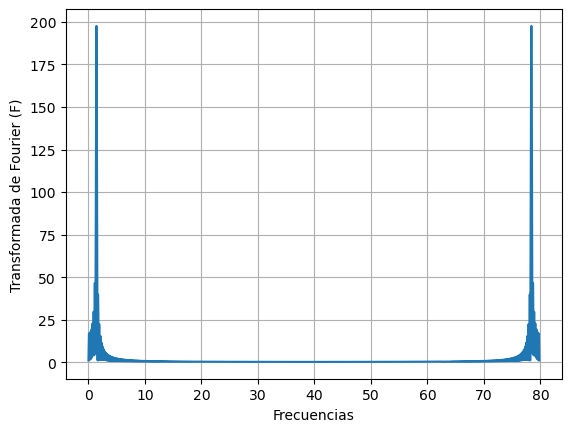

In [434]:
plt.plot(frecuencias,F)
#plt.plot(frecuencias,F,".-")
#plt.xlim(1,2)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
#plt.scatter(frecuencias[indice_altura_max],F[indice_altura_max],color="b")
#plt.scatter(frecuencias[i1],F[i1],color="r")
#plt.scatter(frecuencias[i2],F[i2],color="r")
#plt.axvline(f_0/2)
plt.grid()

## PUNTO 2 D

In [440]:
##Ruido
ruido=np.random.normal(0.0,0.1,N)
y_new=ruido+y

In [436]:
F_new=norma_transformada(frecuencias,t,y_new)

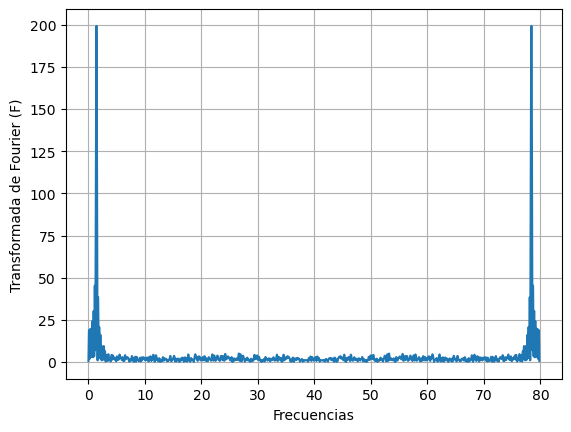

In [437]:
plt.plot(frecuencias,F_new)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.grid()

In [438]:
def pico_FWHM(F,frecuencias):
    F2=F[:int(len(F)/2)]
    frecuencias_2=frecuencias[:int(len(F)/2)]
    indice_altura_max=np.where(F2==np.max(F2))
    altura_max=np.max(F2)
    altura_media=F2[indice_altura_max]/2.0
    resta=np.abs(F2-altura_media)
    valor_min=np.min(resta)
    resta_2=resta[resta>valor_min]
    valor_min_2=np.min(resta_2)
    i1=np.where(resta==valor_min)
    i2=np.where(resta==valor_min_2)
    distancia=np.abs(frecuencias[i1]-frecuencias[i2])
    return distancia[0], altura_max,indice_altura_max[0][0]

## PUNTO 3A

In [439]:
ancho,altura_maxima,posicion=pico_FWHM(F_new,frecuencias)
ancho,altura_maxima,posicion

(0.2394598649662416, 199.2660969628356, 71)

## PUNTO 4

In [464]:
N=100
ts_0=np.linspace(0,10,N)
ts=ts_0+np.random.normal(0.,0.01,N)
f=15
ys=np.sin(2*np.pi*ts*f)
nysquic=1/(ts[1]-ts[0])
nysquic

8.17592566266161

In [465]:
Transformada_Fourier(ts,ys,3*nysquic)

(-3.1614862430192687-4.259474130554677j)

In [466]:
frecuencias=np.linspace(0,3*nysquic,10*N)
Fs=norma_transformada(frecuencias,ts,ys)

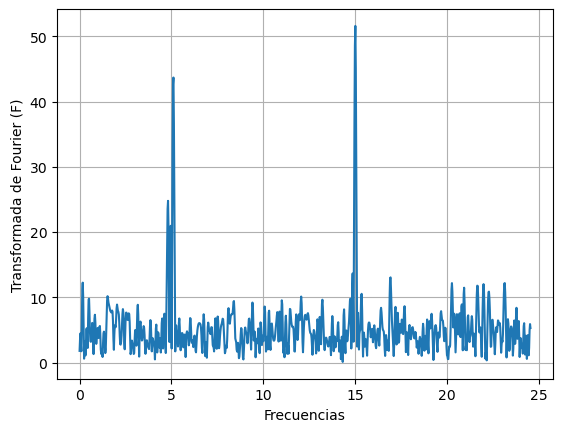

In [468]:
plt.plot(frecuencias,Fs)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.grid()